# Neurons & Layers

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras import Sequential
from tensorflow.keras.losses import MeanSquaredError, BinaryCrossentropy
from tensorflow.keras.activations import sigmoid

## Neuron without activation - Regression/Linear Model

### DataSet


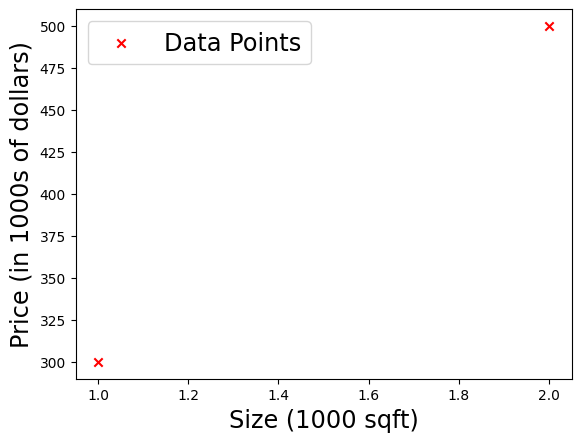

In [3]:
X_train = np.array([[1.0], [2.0]], dtype=np.float32)           #(size in 1000 square feet)
Y_train = np.array([[300.0], [500.0]], dtype=np.float32)       #(price in 1000s of dollars)

fig, ax = plt.subplots(1,1)
ax.scatter(X_train, Y_train, marker='x', c='r', label="Data Points")
ax.legend( fontsize='xx-large')
ax.set_ylabel('Price (in 1000s of dollars)', fontsize='xx-large')
ax.set_xlabel('Size (1000 sqft)', fontsize='xx-large')
plt.show()

### Regression/Linear Model 

In [6]:
linear_layer = tf.keras.layers.Dense(units = 1, activation = 'linear')

In [9]:
linear_layer.get_weights()

[array([[-0.37196994]], dtype=float32), array([0.], dtype=float32)]

There are no weights as the weights are not yet instantiated. Let's try the model on one example in X_train. This will trigger the instantiation of the weights. Note, the input to the layer must be 2-D, so we'll reshape it.

In [10]:
a1 = linear_layer(X_train[0].reshape(1,1))
print(a1)

tf.Tensor([[-0.37196994]], shape=(1, 1), dtype=float32)


In [11]:
w, b = linear_layer.get_weights()
print(f"w = {w}  b = {b}")

w = [[-0.37196994]]  b = [0.]


The weights are initialized to random values so let's set them to some known values.

In [12]:
set_w = np.array([[200]])
set_b = np.array([100])
linear_layer.set_weights([set_w, set_b])
print(linear_layer.get_weights())

[array([[200.]], dtype=float32), array([100.], dtype=float32)]


In [13]:
prediction_tf = linear_layer(X_train)
prediction_np = np.dot(X_train, set_w) + set_b
print(prediction_tf)
print(prediction_np)

tf.Tensor(
[[300.]
 [500.]], shape=(2, 1), dtype=float32)
[[300.]
 [500.]]


As you can see, both produce the same prediction!

We can see this graphically with the help of the below code


In [14]:
import matplotlib.pyplot as plt

def plt_linear(X, Y, prediction_tf, prediction_np):
    plt.figure(figsize=(12, 4))

    # TensorFlow plot
    plt.subplot(1, 2, 1)
    plt.plot(X, prediction_tf, c='b', label='model output')  # predicted line
    plt.scatter(X, Y, c='r', marker='*', label='Data Points')  # actual data
    plt.xlabel("Size (1000 sqft)")
    plt.ylabel("Price (in 1000s of dollars)")
    plt.title("Tensorflow prediction")
    plt.legend()
    plt.text(1.3, 350, 'y=200x + 100', fontsize=12, color='magenta')  # equation

    # NumPy plot
    plt.subplot(1, 2, 2)
    plt.plot(X, prediction_np, c='b', label='model output')
    plt.scatter(X, Y, c='r', marker='*', label='Data Points')
    plt.xlabel("Size (1000 sqft)")
    plt.ylabel("Price (in 1000s of dollars)")
    plt.title("Numpy prediction")
    plt.legend()
    plt.text(1.3, 350, 'y=200x + 100', fontsize=12, color='magenta')

    plt.tight_layout()
    plt.show()

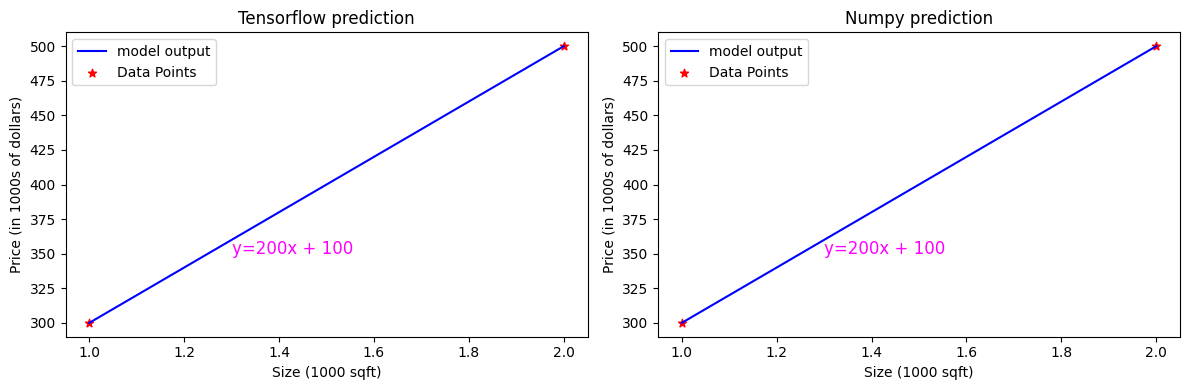

In [15]:
plt_linear(X_train, Y_train, prediction_tf, prediction_np)

## Neuron with Sigmoid activation


### DataSet

In [16]:
X_train = np.array([0., 1, 2, 3, 4, 5], dtype=np.float32).reshape(-1,1)  # 2-D Matrix
Y_train = np.array([0,  0, 0, 1, 1, 1], dtype=np.float32).reshape(-1,1)  # 2-D Matrix

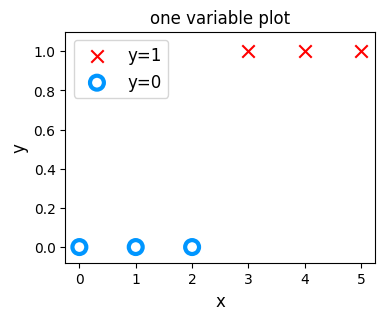

In [33]:
pos = Y_train == 1
neg = Y_train == 0
dlc = {"dlblue": "#0096FF", "dlorange": "#FF9300", "dlred": "#FF2C00"}


fig,ax = plt.subplots(1,1,figsize=(4,3))
ax.scatter(X_train[pos], Y_train[pos], marker='x', s=80, c = 'red', label="y=1")
ax.scatter(X_train[neg], Y_train[neg], marker='o', s=100, label="y=0", facecolors='none', 
              edgecolors=dlc["dlblue"],lw=3)

ax.set_ylim(-0.08,1.1)
ax.set_ylabel('y', fontsize=12)
ax.set_xlabel('x', fontsize=12)
ax.set_title('one variable plot')
ax.legend(fontsize=12)
plt.show()

### Logistic Neuron


In [22]:
model = Sequential(
    [
        tf.keras.layers.Dense(1, input_dim=1,  activation = 'sigmoid', name='L1')
    ]
)

c:\Users\hnegi\Documents\ML-Learning-Path\venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
#model.summary() shows the layers and number of parameters in the model
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ L1 (Dense)                      │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

In [26]:
logistic_layer = model.get_layer('L1')
w,b = logistic_layer.get_weights()
print(w, b)
print(w.shape, b.shape)

[[0.49875724]] [0.]
(1, 1) (1,)


Let's set the weight and bias to some known values.

In [27]:
set_w = np.array([[2]])
set_b = np.array([-4.5])
# set_weights takes a list of numpy arrays
logistic_layer.set_weights([set_w, set_b])
print(logistic_layer.get_weights())

[array([[2.]], dtype=float32), array([-4.5], dtype=float32)]


In [28]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [29]:
a1 = model.predict(X_train[0].reshape(1,1))
print(a1)
alog = sigmoid(np.dot(set_w,X_train[0].reshape(1,1)) + set_b)
print(alog)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step
[[0.01098694]]
[[0.01098694]]


They produce the same values! Now, we can use our logistic layer and NumPy model to make predictions on our training data

In [ ]:


def plt_logistic(X_train, Y_train, model, set_w, set_b, pos, neg):
    # Meshgrid for background prediction colors
    x_min, x_max = X_train.min() - 0.5, X_train.max() + 0.5
    y_min, y_max = Y_train.min() - 0.5, Y_train.max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                         np.linspace(y_min, y_max, 500))
    
    # Flatten meshgrid to make predictions
    grid = xx.ravel().reshape(-1, 1)
    
    # TensorFlow model predictions
    z_tf = model.predict(grid).reshape(xx.shape)

    # Numpy (manual) sigmoid predictions
    z_np = sigmoid(set_w * grid + set_b).reshape(xx.shape)

    # Plotting
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

    # TensorFlow plot
    ax1.contourf(xx, yy, z_tf, levels=100, cmap="Blues", alpha=0.5)
    ax1.scatter(X_train[Y_train[:,0] == 1], Y_train[Y_train[:,0] == 1], c='red', marker='x', s=100, label="y=1")
    ax1.scatter(X_train[Y_train[:,0] == 0], Y_train[Y_train[:,0] == 0], facecolors='none', edgecolors='blue', s=100, label="y=0")
  

    ax1.set_title("Tensorflow Model")
    ax1.set_xlabel("x")
    ax1.set_ylabel("y")
    ax1.legend()

    # NumPy plot
    ax2.contourf(xx, yy, z_np, levels=100, cmap="Blues", alpha=0.5)
    ax2.scatter(X_train[Y_train[:,0] == 1], Y_train[Y_train[:,0] == 1], c='red', marker='x', s=100, label="y=1")
    ax2.scatter(X_train[Y_train[:,0] == 0], Y_train[Y_train[:,0] == 0], facecolors='none', edgecolors='blue', s=100, label="y=0")
   

    ax2.set_title("Numpy Model")
    ax2.set_xlabel("x")
    ax2.set_ylabel("y")
    ax2.legend()

    plt.tight_layout()
    plt.colorbar(ax1.contourf(xx, yy, z_tf, levels=100, cmap="Blues", alpha=0.5), ax=ax1)
    plt.colorbar(ax2.contourf(xx, yy, z_np, levels=100, cmap="Blues", alpha=0.5), ax=ax2)
    plt.show()

: 

7813/7813 ━━━━━━━━━━━━━━━━━━━━ 6s 750us/step


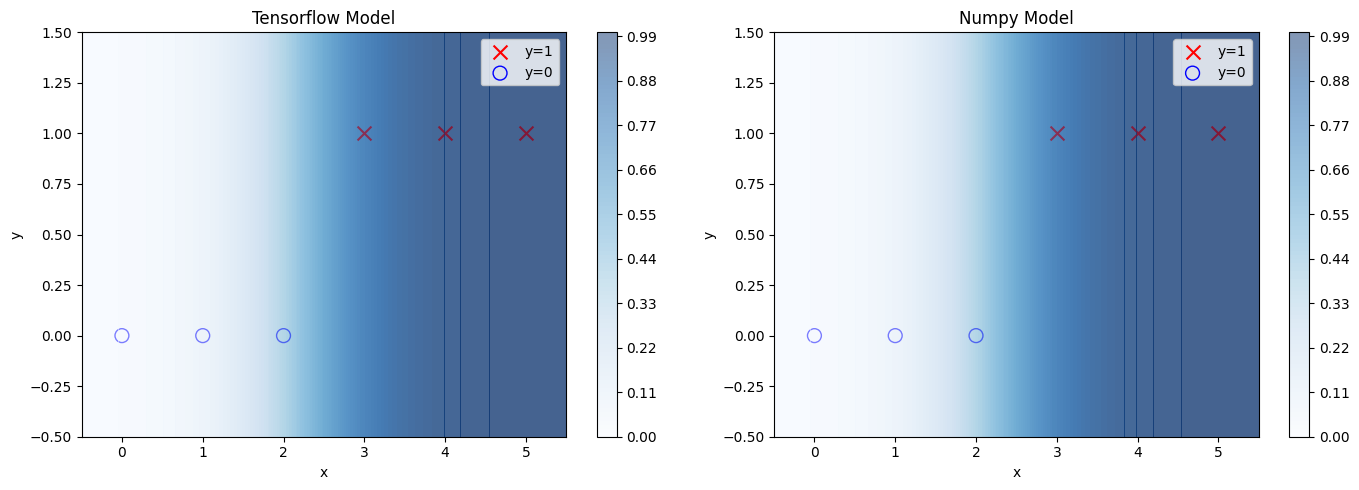

In [37]:
plt_logistic(X_train, Y_train, model, set_w, set_b, pos, neg)

We built a very simple neural network and have explored the similarities of a neuron to the linear and logistic regression.